# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [101]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

#print(np.__version__) #print numpy version, e.g., 1.21.5
#to upgrade: pip install --upgrade numpy

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Import data

Read the data from the CSV file and display some values to see if the reading is good.
I used ";" as a separator when reading from the file in order to read correctly the data.

In [102]:
import pandas as pd

data = pd.read_csv("MergeConflictsDataset.csv", sep=";")

data = data.ffill()
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


Print the data about the columns to get a better understanding of the data.

In [103]:
data.columns

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'conflict'],
      dtype='object')

Use a simple data.fix in order to detect mixed data types and fix it

In [104]:
data.fix

0        0
1        1
2        0
3        1
4        1
        ..
26968    0
26969    1
26970    1
26971    1
26972    0
Name: fix, Length: 26973, dtype: int64

Get some info about the dataset

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26973 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

Check the number of bugs and how often it is to encounter one in the code commited

In [106]:
data["bug"].value_counts()

bug
0     22525
1      2331
2       784
3       387
4       253
5       163
6       103
7        90
9        51
8        51
11       38
10       36
12       31
13       29
14       23
15       13
16       11
21        9
17        8
19        6
20        6
18        4
22        3
53        2
26        2
27        2
52        1
37        1
25        1
30        1
45        1
40        1
24        1
55        1
42        1
43        1
89        1
73        1
Name: count, dtype: int64

Describe the dataset to get a better understanding of the data stored in it

In [107]:
data.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


In [108]:
data_list = data.columns[data.isnull().any()].tolist()
print(data_list)

[]


In [109]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [110]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [111]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), "train +", len(test_set), "test")

21579 train + 5394 test


In [112]:
train_set.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
21189,97b99e45175f4d95ff024a0a54e1efee85334d90,e7807c4f2d4854a879eb77eb80ce8366746f4652,af213241ab47a27fdb611c9fff1db7d4b857218f,e7807c4f2d4854a879eb77eb80ce8366746f4652,1,1,1,0,1,1,...,0,0,0,0,0,8,8,8.000000,8.0,0
25076,b6cd856b08e3860e59cc126be86b901ccab4f193,ff7368eb6b40c75b44b0abc6e6a2bf792f4afc6b,a1c34bd286d57625b844703705a39e40737a21ba,d7a4c3252ed5e630b7fb6e4b4616daddfe574fc5,1,1,1,4,1,49,...,1,0,0,1,1,83,137,106.071429,105.5,0
23271,d0904ded84bcae2fdbac1ef3eccdde63bceda555,aac4c01786e9bed0f29f24e49a72a1c7472b79d6,30eb5c7342cd8edeef7bfdb6ba3458d023524074,232eb9f8e66fc9047a6187de4c17f37ba6409e2f,1,1,0,19,1,207,...,19,2,6,1,6,65,422,133.030864,120.5,0
3658,8714710170dae03824416bf5aa8a19e14190c723,4b5c370701e8e58b123b2940b4c5eb6d36e11b1b,de2a01eee4d8e31e1245eb265831731926f08c64,7882a33e07882d3c78cbeb14cb151145521a2245,0,1,1,31,1,0,...,21,15,19,0,3,12,125,40.507653,36.0,0
257,27fdb171e2e00663cf1d0617f82f34c02289e693,642411cdc62dde62b7e9bfbc583a3cd3624e9633,09294c46a7bee4caf681cc3281f2a04085c9b72e,3c6be1aa1e0e9c6f0b3c0675bd458d4075974463,0,19,6,1,9,213,...,0,0,1,0,0,15,81,42.741935,49.0,0


We check how often it is to encounter a conflict in the train dataset:
20416 - we do not encounter a conflict
1163 - we encounter conflict

In [113]:
x = train_set[train_set.columns.drop('conflict')]
y = train_set['conflict']
y.value_counts()

conflict
0    20416
1     1163
Name: count, dtype: int64

We start dropping some collums that are not relevant, such as parent1, parent2, commit and ancestor, because they are just id fields and do not convey relevant data, just indication of the id.

In [114]:
data.drop(columns=['commit', 'parent1', 'parent2', 'ancestor'], inplace=True)

When doing the correlation matrix I realized that the collumn and line coresponding to the "copied files" is white, meaning that it has no correlation to the rest of the data. This is why I decided to drop it from my dataset.

In [115]:
data.drop(columns=['copied files'], inplace=True)

I merged the parents, density and commits into new fields developers_merged, density_merged and nr_commits_merged and dropped the initial collums.

In [116]:
data['developers_merged'] = (data['devs parent1'] + data['devs parent2'])
data.drop(columns=['devs parent1'], inplace = True)
data.drop(columns=['devs parent2'], inplace = True)

In [117]:
data['density_merged'] = (data['density1'] + data['density2'])/2
data.drop(columns=['density1'], inplace = True)
data.drop(columns=['density2'], inplace = True)

In [118]:
data['nr commits merged'] = (data['nr commits1'] + data['nr commits2'])
data.drop(columns=['nr commits1'], inplace = True)
data.drop(columns=['nr commits2'], inplace = True)

Check the number of added lines and their frequency

In [119]:
data["added lines"].value_counts()

added lines
1        5155
2        1971
0        1366
3        1125
4         898
         ... 
3121        1
5300        1
6562        1
4902        1
31486       1
Name: count, Length: 1831, dtype: int64

To get a more relevant histogram I deleted entries form the dataset that have more than 6000 lines for better visualisation. Also I check if there are added lines with minus sign, which souldn't happen and remove them as well.

In [120]:
data = data.drop(data[data['added lines'] > 6000].index)

In [121]:
data = data.drop(data[data['added lines'] < 0].index)

In [122]:
data["added lines"].value_counts()

added lines
1       5155
2       1971
0       1366
3       1125
4        898
        ... 
3816       1
3456       1
1509       1
958        1
919        1
Name: count, Length: 1588, dtype: int64

Plot the data

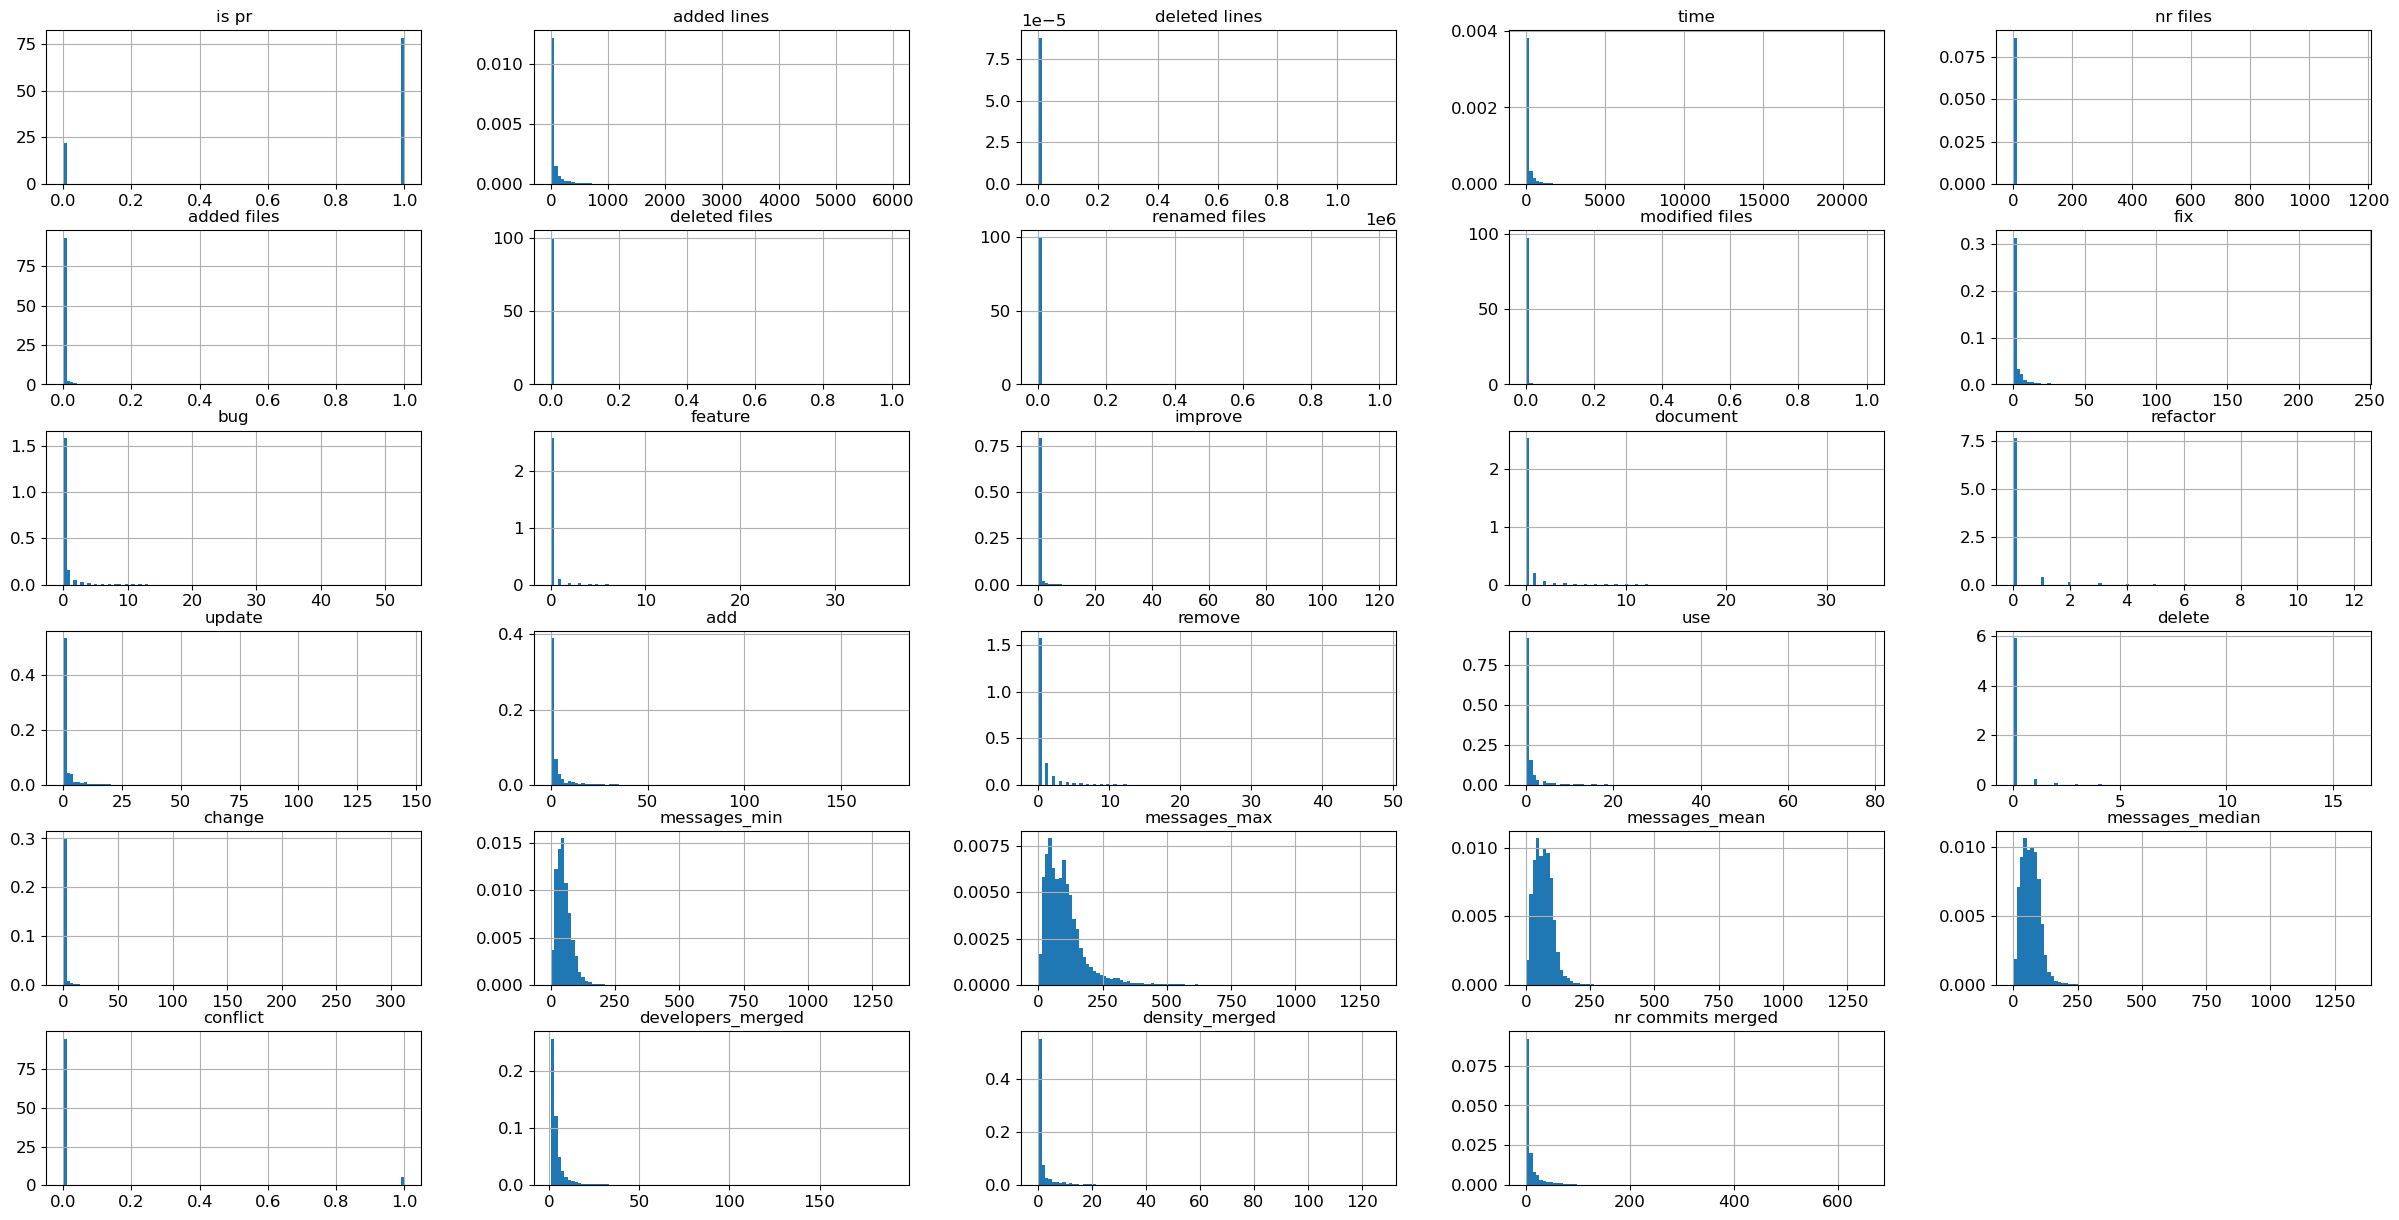

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ['added files', 'deleted files', 'renamed files', 'modified files']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the selected columns
data_scaled = data.copy()  # Make a copy of the original data
data_scaled[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data_scaled.hist(bins=100, figsize=(30,15), density=True)
plt.show()

Display the correlation matrix

                      is pr  added lines  deleted lines      time  nr files  \
is pr              1.000000    -0.142030      -0.011411 -0.056994 -0.081224   
added lines       -0.142030     1.000000       0.045118  0.070979  0.039597   
deleted lines     -0.011411     0.045118       1.000000  0.001557  0.007477   
time              -0.056994     0.070979       0.001557  1.000000  0.021099   
nr files          -0.081224     0.039597       0.007477  0.021099  1.000000   
added files       -0.072868     0.583050       0.017955  0.062111  0.012330   
deleted files     -0.008093     0.031116       0.992866  0.002279  0.006308   
renamed files     -0.026850     0.116740       0.008217  0.006608  0.005611   
modified files    -0.095899     0.395108       0.022406  0.030108  0.042076   
fix               -0.103895     0.094910       0.001379  0.256893  0.097214   
bug               -0.079053     0.104132       0.000854  0.170732  0.077261   
feature           -0.066839     0.038131       0.024

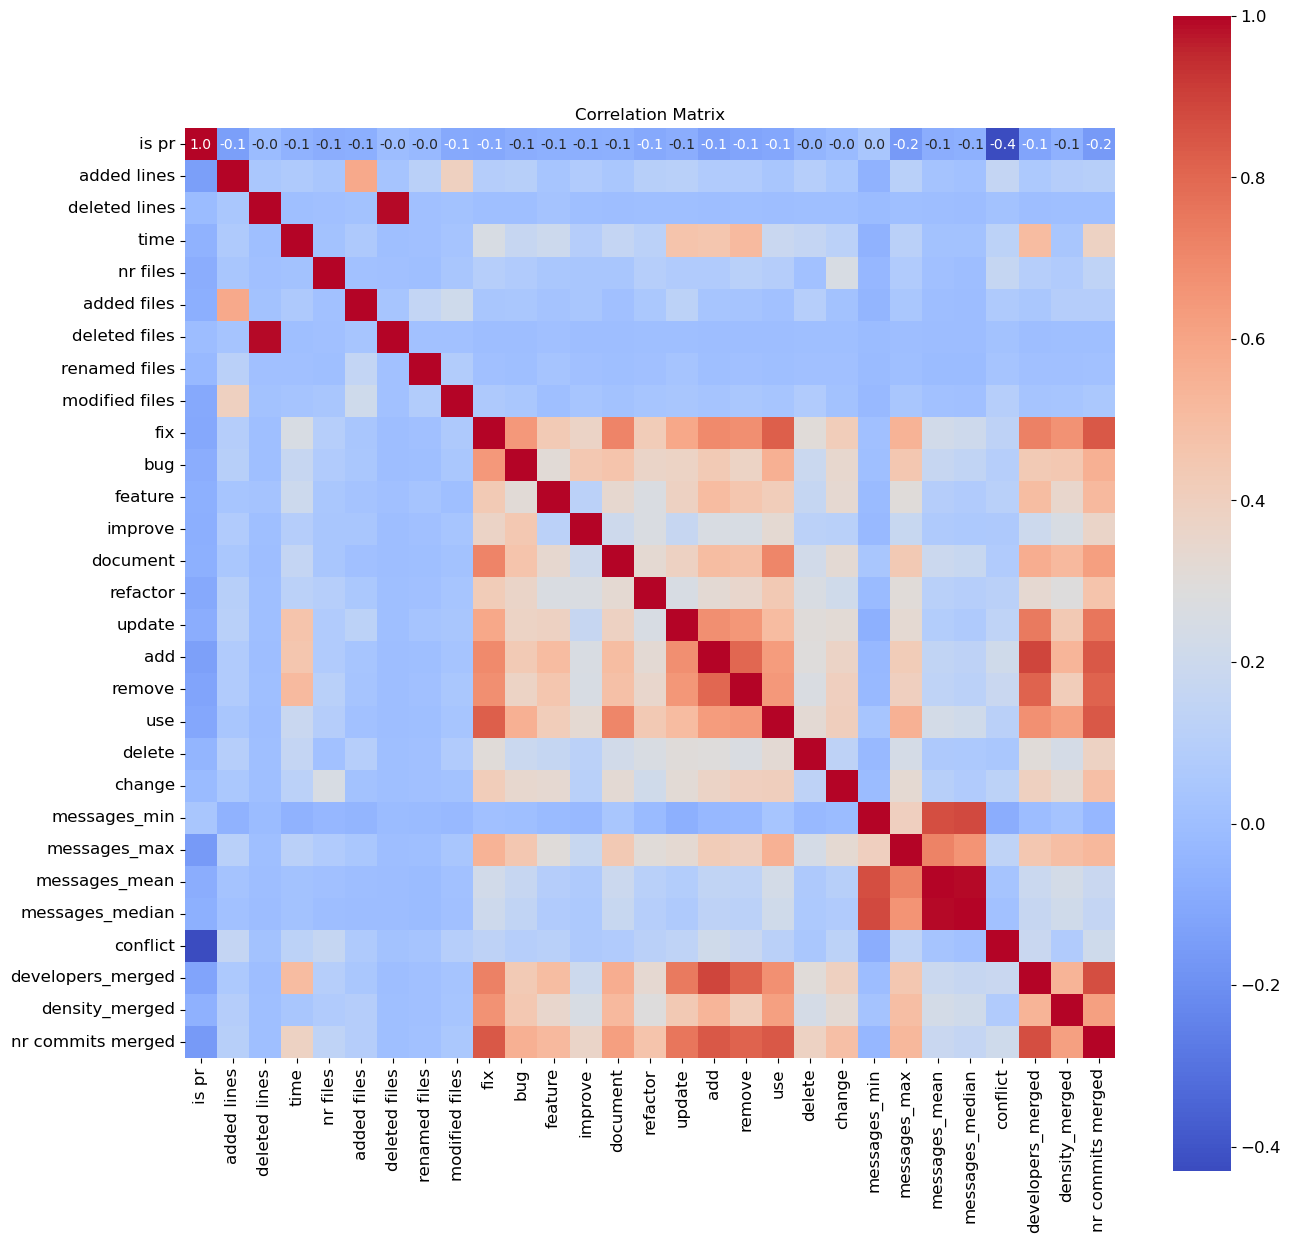

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

I used a scatter diagram to see the correlation between fileds of messages type

array([[<Axes: xlabel='messages_min', ylabel='messages_min'>,
        <Axes: xlabel='messages_max', ylabel='messages_min'>,
        <Axes: xlabel='messages_mean', ylabel='messages_min'>,
        <Axes: xlabel='messages_median', ylabel='messages_min'>],
       [<Axes: xlabel='messages_min', ylabel='messages_max'>,
        <Axes: xlabel='messages_max', ylabel='messages_max'>,
        <Axes: xlabel='messages_mean', ylabel='messages_max'>,
        <Axes: xlabel='messages_median', ylabel='messages_max'>],
       [<Axes: xlabel='messages_min', ylabel='messages_mean'>,
        <Axes: xlabel='messages_max', ylabel='messages_mean'>,
        <Axes: xlabel='messages_mean', ylabel='messages_mean'>,
        <Axes: xlabel='messages_median', ylabel='messages_mean'>],
       [<Axes: xlabel='messages_min', ylabel='messages_median'>,
        <Axes: xlabel='messages_max', ylabel='messages_median'>,
        <Axes: xlabel='messages_mean', ylabel='messages_median'>,
        <Axes: xlabel='messages_median', 

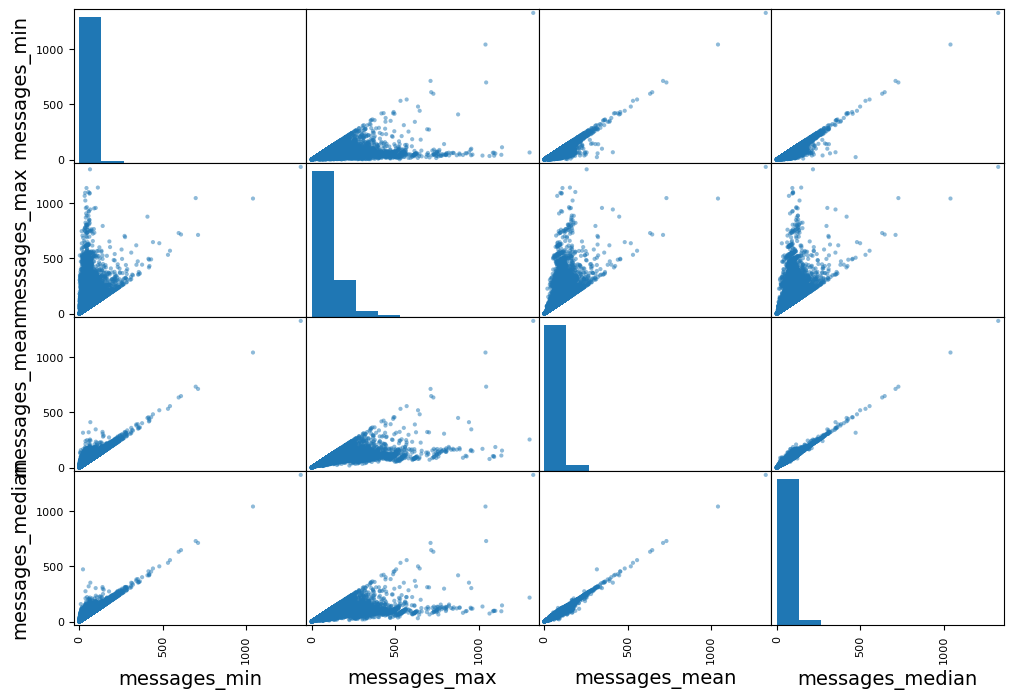

In [125]:
from pandas.plotting import scatter_matrix

attributes = ["messages_min", "messages_max", "messages_mean",
              "messages_median"]
scatter_matrix(data[attributes], figsize=(12, 8))

I used a scatter diagram to see the correlation between fileds of density type

array([[<Axes: xlabel='developers_merged', ylabel='developers_merged'>,
        <Axes: xlabel='density_merged', ylabel='developers_merged'>,
        <Axes: xlabel='nr commits merged', ylabel='developers_merged'>],
       [<Axes: xlabel='developers_merged', ylabel='density_merged'>,
        <Axes: xlabel='density_merged', ylabel='density_merged'>,
        <Axes: xlabel='nr commits merged', ylabel='density_merged'>],
       [<Axes: xlabel='developers_merged', ylabel='nr commits merged'>,
        <Axes: xlabel='density_merged', ylabel='nr commits merged'>,
        <Axes: xlabel='nr commits merged', ylabel='nr commits merged'>]],
      dtype=object)

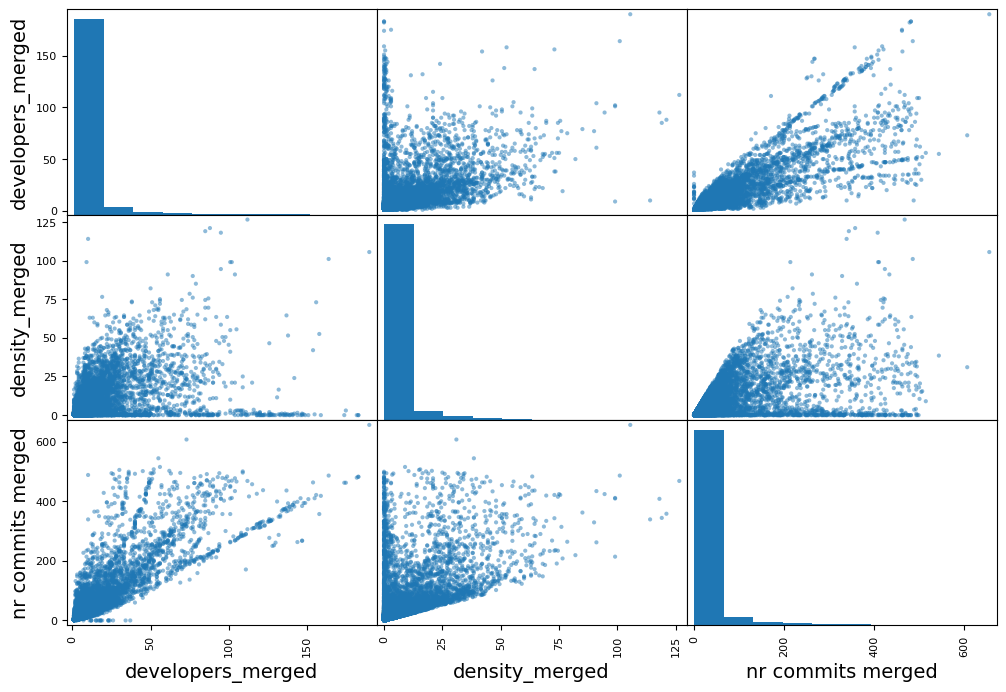

In [126]:
from pandas.plotting import scatter_matrix

attributes = ["developers_merged", "density_merged",
              "nr commits merged"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [127]:
corr_matrix = data.corr()
corr_matrix["modified files"].sort_values(ascending=False)

modified files       1.000000
added lines          0.395108
added files          0.212266
conflict             0.100076
renamed files        0.081408
delete               0.074506
fix                  0.063466
nr commits merged    0.051945
bug                  0.050148
remove               0.047464
messages_max         0.043376
nr files             0.042076
update               0.041816
refactor             0.038845
improve              0.036601
use                  0.035813
density_merged       0.035675
add                  0.031323
time                 0.030108
developers_merged    0.028553
deleted lines        0.022406
document             0.020998
change               0.019299
deleted files        0.013580
messages_mean        0.013375
messages_median      0.009855
feature              0.005627
messages_min        -0.027610
is pr               -0.095899
Name: modified files, dtype: float64

In [128]:
# Drop columns containing non-numeric values
num_data = data.select_dtypes(include='number')
median_values = num_data.median()

print("Median values:", median_values)

Median values: is pr                 1.000000
added lines          11.000000
deleted lines         2.000000
time                 36.000000
nr files              0.000000
added files           0.000000
deleted files         0.000000
renamed files         0.000000
modified files        1.000000
fix                   1.000000
bug                   0.000000
feature               0.000000
improve               0.000000
document              0.000000
refactor              0.000000
update                0.000000
add                   0.000000
remove                0.000000
use                   0.000000
delete                0.000000
change                0.000000
messages_min         46.000000
messages_max         87.000000
messages_mean        66.333333
messages_median      65.000000
conflict              0.000000
developers_merged     3.000000
density_merged        0.500000
nr commits merged     4.000000
dtype: float64


Better visaulisation of the same thing as above

In [129]:
median_array = median_values.values
print (median_array)

[ 1.         11.          2.         36.          0.          0.
  0.          0.          1.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         46.         87.         66.33333333
 65.          0.          3.          0.5         4.        ]


# Model Training


I train the first model by selecting inside the X variable the, "added lines" column and check for conflicts. Basically, I want to know if by adding lines I get conficts.

y is the target variable and I predict conflict based on added lines. 

Set the random state to 42 to get the same result each time. 

Confusion Matrix - The result is telling us that we have 5087+5 correct predictions and 239+15 incorrect predictions.

In [130]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import brier_score_loss

X = data[["added lines"]]
y = data["conflict"]

clf = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred, zero_division=1)
confusion_matrix = confusion_matrix(y_test, y_pred)
brier_loss = brier_score_loss(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: ", classification_report)
print("Confusion Matrix: ", confusion_matrix)
print("Length of the training data:", len(X_train))
print("Brier Score Loss: ", brier_loss)

Accuracy:  0.9524878413767303
Classification report:                precision    recall  f1-score   support

           0       0.96      1.00      0.98      5102
           1       0.25      0.02      0.04       244

    accuracy                           0.95      5346
   macro avg       0.60      0.51      0.51      5346
weighted avg       0.92      0.95      0.93      5346

Confusion Matrix:  [[5087   15]
 [ 239    5]]
Length of the training data: 21382
Brier Score Loss:  0.04751215862326973


Get some info about the resulted training

In [131]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5346 entries, 3251 to 19664
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   added lines  5346 non-null   int64
dtypes: int64(1)
memory usage: 83.5 KB


In [132]:
X_test.describe()

,added lines
count,5346.000000
mean,141.024691
std,501.960453
min,0.000000
25%,2.000000
50%,11.000000
75%,68.000000
max,5975.000000


Get the correlation coefficients

In [133]:
numeric_data = data.select_dtypes(include="number")

filtered_data = numeric_data.dropna()
correlation_matrix = filtered_data.corr()
target_correlation = correlation_matrix["conflict"].abs().sort_values(ascending=False)

print("Correlation Coefficients:", target_correlation)

Correlation Coefficients: conflict             1.000000
is pr                0.429811
add                  0.216541
nr commits merged    0.210384
remove               0.184059
developers_merged    0.183610
nr files             0.166825
added lines          0.160809
messages_max         0.139627
update               0.139556
fix                  0.133801
time                 0.127649
change               0.125020
refactor             0.115649
use                  0.113720
feature              0.108853
bug                  0.100377
modified files       0.100076
messages_min         0.078680
document             0.078380
density_merged       0.078206
added files          0.072094
improve              0.067047
delete               0.049990
renamed files        0.031384
messages_mean        0.029826
deleted lines        0.021534
deleted files        0.018768
messages_median      0.015719
Name: conflict, dtype: float64


Here I take the 0.15 threshold and so order the columns more impactful and drop the columns which have a less than 0.15 corelation keeping only the more important ones. I set it to 0.15 because the treshhold needs to be smaller than 1 and also needs to not be too small to get relevant results.

In [152]:
threshold = 0.1

selected_columns = target_correlation[target_correlation > threshold].index.tolist()

filtered_dataset = data[selected_columns]

print("Modified Dataset:")
filtered_dataset.head()

Modified Dataset:


,conflict,is pr,add,nr commits merged,remove,developers_merged,nr files,added lines,messages_max,update,fix,time,change,refactor,use,feature,bug,modified files
0,0,1,0,5,0,1,0,5,65,3,0,23,0,0,0,0,0,4
1,1,0,0,49,0,3,3,1166,117,1,1,371,0,0,0,0,0,177
2,0,1,0,1,0,1,0,0,18,0,0,22,0,0,0,0,0,1
3,0,1,0,6,0,3,1,0,63,0,1,24,0,0,0,0,0,1
4,1,0,0,3,0,3,1,0,56,0,1,2,0,0,0,0,0,1


In [142]:
from sklearn.naive_bayes import GaussianNB
                          
naive_bayes = GaussianNB()

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = filtered_dataset.drop(columns=["conflict"])
y = filtered_dataset["conflict"]

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

accuracy = rf_pipeline.score(X_test, y_test)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:", classification_report)
print("Confusion Matrix:", confusion_matrix)
print("Length of the training data:", len(X_train))


Accuracy: 0.966704077815189
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5102
           1       0.65      0.60      0.62       244

    accuracy                           0.97      5346
   macro avg       0.81      0.79      0.80      5346
weighted avg       0.97      0.97      0.97      5346

Confusion Matrix: [[5022   80]
 [  98  146]]
Length of the training data: 21382


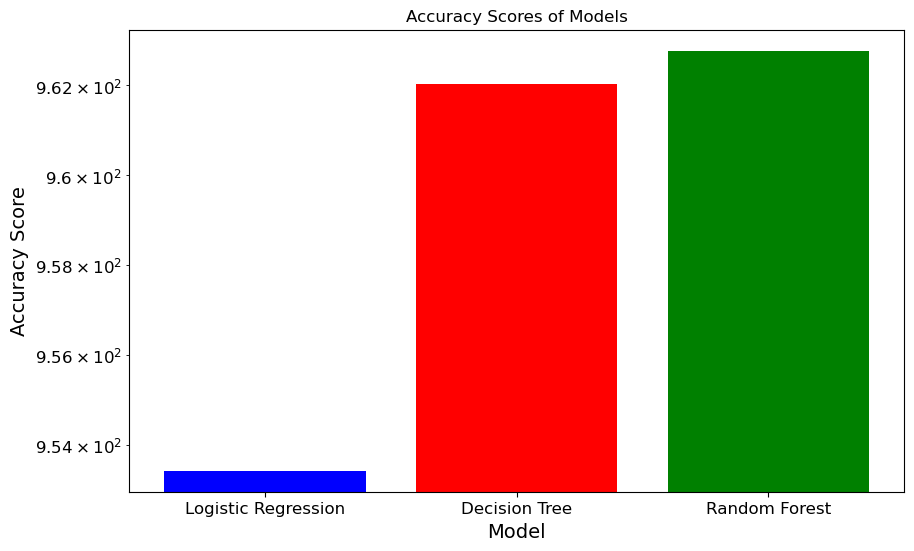

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

numeric_features = ["added lines", "nr files"]
categorical_features = ["is pr"]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

accuracy_scores = {}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), 
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

colors = ['blue', 'red', 'green'] 

for index, (name, model) in enumerate(models.items()):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scaled_accuracy = accuracy * 1000  
    accuracy_scores[name] = scaled_accuracy

plt.figure(figsize=(10, 6))
plt.yscale('log')
for index, (name, accuracy) in enumerate(accuracy_scores.items()):
    plt.bar(name, accuracy, color=colors[index])  

plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Models')
plt.show()

Testing if the model is underfitting or overfitting and printing a message to further know to correct it.

In [167]:
train_accuracy = rf_pipeline.score(X_train, y_train)
print("Training Accuracy: ", train_accuracy)

test_accuracy = rf_pipeline.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

if train_accuracy > test_accuracy:
    print("Overfitting")
elif train_accuracy < test_accuracy:
    print("Underfitting")
else:
    print("Good")


Training Accuracy:  0.9971939014124029
Test Accuracy:  0.966704077815189
Overfitting
